In [1]:
wd <- dirname(dirname(getwd()))
source(paste0(wd,"/mission_control/treasure_map.R"))
source(paste0(wd,"/mission_control/helpers/figures/figure5_themes.R"))

library(tidyverse)
library(gridExtra)
library(ggpubr)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.1.2     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ dplyr   1.0.6
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  3.1.2     ✔ forcats 0.5.1
Warning message:
“package ‘tibble’ was built under R version 3.6.3”Warning message:
“package ‘tidyr’ was built under R version 3.6.3”Warning message:
“package ‘purrr’ was built under R version 3.6.3”Warning message:
“package ‘dplyr’ was built under R version 3.6.3”Warning message:
“package ‘forcats’ was built under R version 3.6.3”── Conflicts ────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



#### 0 - Read Subplots

In [2]:
annote <- function( i, lab, size = 25 ) annotate_figure( i, fig.lab = lab, fig.lab.size = size, fig.lab.face = "bold")

In [3]:
go <- readRDS(paste0(FIG_DIR, "figure5_g.Rds"))
main_p <- annote(go$main + theme(plot.title = element_text(size = 35), axis.title = element_text(size = 30), axis.text = element_text(size = 30), plot.margin = unit(c(.5,.5,1.5,.5), "cm")), "A")
exs <- go$exs

Warning message:
“Removed 1 rows containing missing values (geom_point).”

### 1- Arrange plot

In [4]:
labs <- seq(4); 
j <- 1; 
clean_exs <- list()
for( i in names(exs) ){
    clean_exs[[i]] <- annote(exs[[i]] + theme(plot.margin = unit(c(7,2,.5,2), "cm")), lab = as.character(labs[j])) 
    j <- j+1
}

In [5]:
top <- arrangeGrob(main_p, layout_matrix = rbind(c(2,1,1,1,3)))

In [6]:
options(repr.plot.width=24, repr.plot.height=36, repr.plot.res = 200)
top <- arrangeGrob(main_p, layout_matrix = rbind(c(2,1,1,1,3)))
bottom <- arrangeGrob( clean_exs[[1]], clean_exs[[2]], clean_exs[[3]], 
            clean_exs[[4]], 
            layout_matrix = rbind(seq(2), seq(2)+2))
go <- as_ggplot(arrangeGrob(top, bottom, layout_matrix = cbind(c(1,1,2,2,2))))

### 2 - Send it!

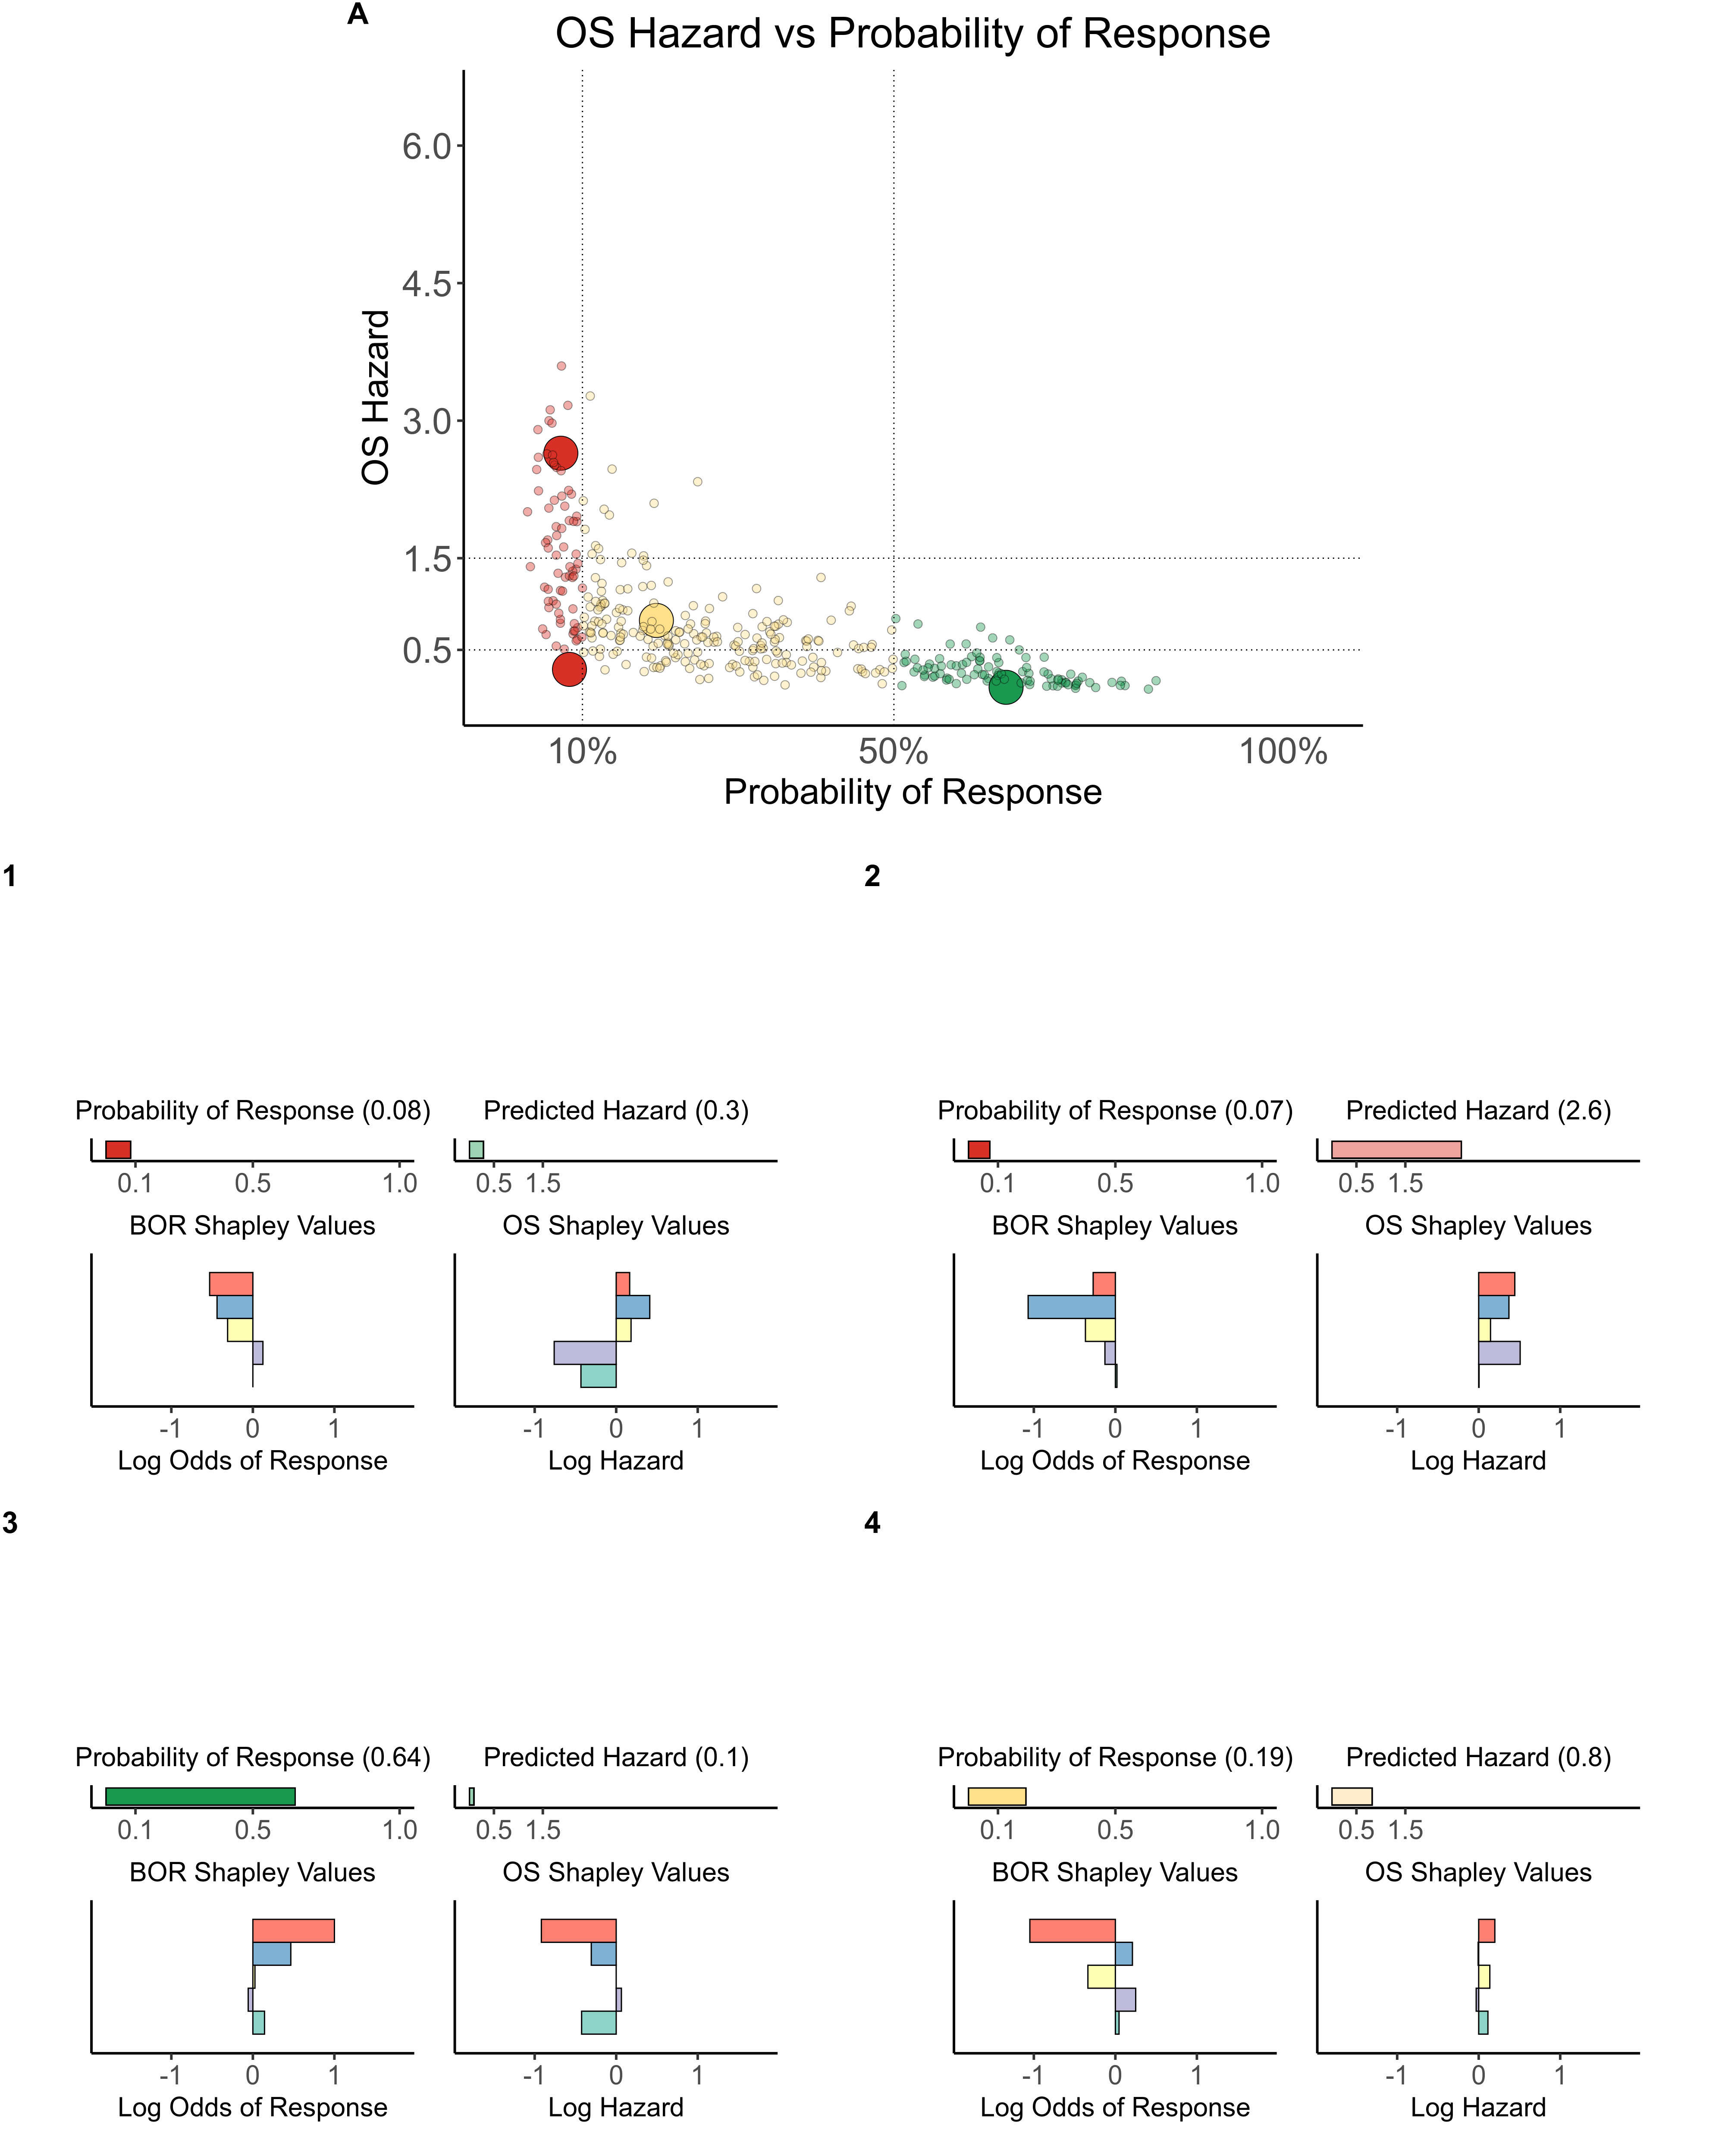

In [7]:
options(repr.plot.width=20, repr.plot.height=25, repr.plot.res = 200)
go
ggsave( paste0(FIG_FINAL_DIR, "5_supplement_main_shapley_examples.png"), width = 20, height = 25)